
### Data coordinates

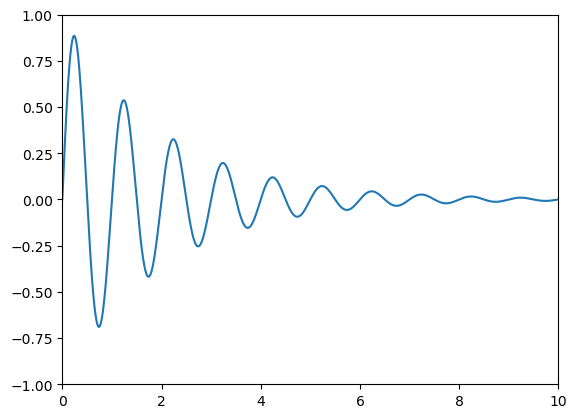

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches


## When data is added the Axes, Matplotlib updates the data limits, most commonly updated with the set_xlim() and set_ylim() methods. 


x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

plt.show()

In [4]:
# ax.transData instance transforms FROM the data TO the display coordinate system:

type(ax.transData)

matplotlib.transforms.CompositeGenericTransform

In [5]:
ax.transData.transform((5, 0))

array([328. , 237.6])

In [6]:
ax.transData.transform([(5, 0), (1, 2)])

array([[328. , 237.6],
       [129.6, 607.2]])

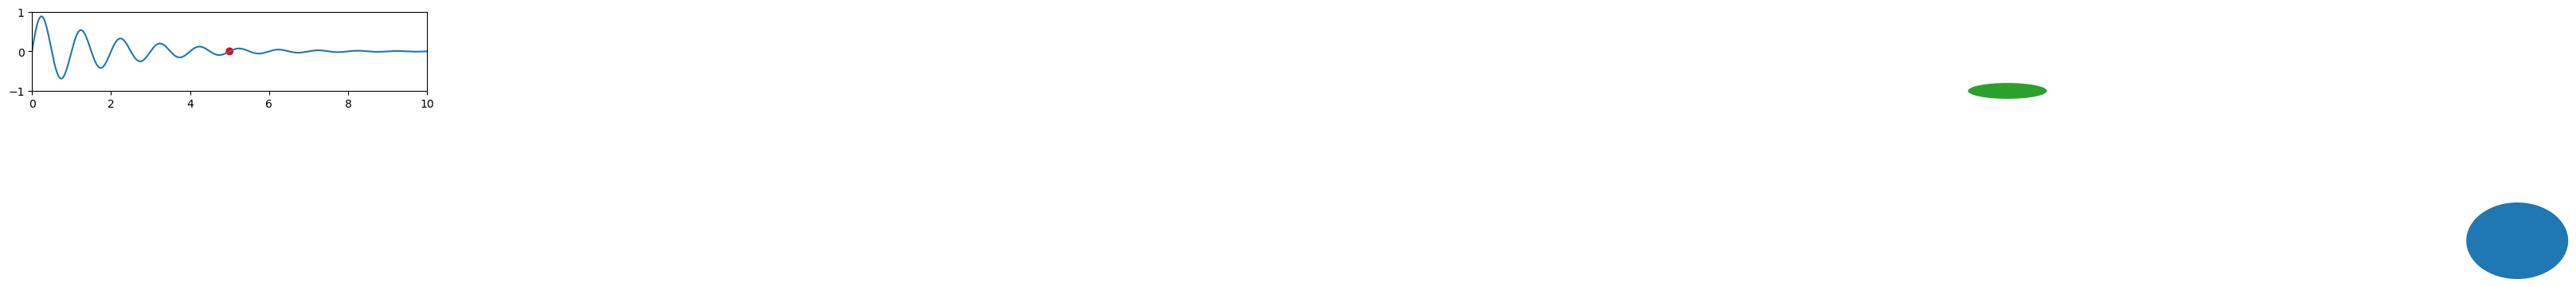

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

ax.add_artist(plt.Circle((5, 0), 0.1, facecolor='red')) # This circle is in the data coordinate system
fig.add_artist(plt.Circle((5, 0), 0.1)) # This circle is in the figure coordinate system

ax.add_artist(plt.Circle((5, 0), 0.1, facecolor='tab:green',clip_on=False, transform=ax.transAxes)) # This circle is in the data coordinate system

#fig.add_artist(plt.Circle((5, 0), 0.1, transform=ax.transData))
#ax.add_artist(plt.Circle((5, 0), 0.1, transform=ax.transAxes))

ax.set_aspect('equal') # Added to make the circle look like a circle

plt.show()

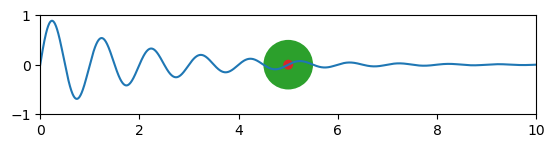

In [44]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

inv = ax.transData.inverted()
ax.add_artist(plt.Circle((5, 0), 0.1, facecolor='tab:red')) # This circle is in the data coordinate system
ax.add_artist(plt.Circle( inv.transform([328. , 237.6]), 0.5, facecolor='tab:green',zorder=-1,clip_on=False)) # This circle is in the data coordinate system

#fig.add_artist(plt.Circle((5, 0), 0.1, transform=ax.transData))
#ax.add_artist(plt.Circle((5, 0), 0.1, transform=ax.transAxes))

ax.set_aspect('equal') # Added to make the circle look like a circle

plt.show()

In [113]:
ax.transData.transform((5, 0)) , inv.transform([328. , 237.6])

(array([328. , 237.6]), array([5., 0.]))

------

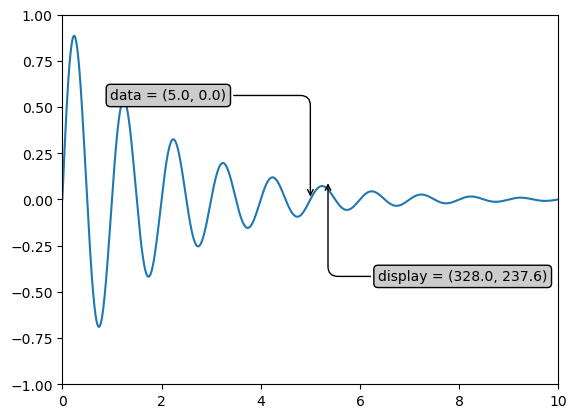

In [ ]:
""" 
The two arrows for the data and display annotations do not point to exactly the same point.
This is because the display point was computed before the figure was displayed, and the GUI backend may slightly resize the figure when it is created.
The effect is more pronounced if you resize the figure yourself. This is one good reason why you rarely want to work in display space
"""   

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
# This computing the transform now, if anything
# (figure size, dpi, axes placement, data limits, scales..)
# changes re-calling transform will get a different value.
xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate(f'data = ({xdata:.1f}, {ydata:.1f})',
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

disp = ax.annotate(f'display = ({xdisplay:.1f}, {ydisplay:.1f})',
                   (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
                   xycoords='figure pixels',
                   textcoords='offset points',
                   bbox=bbox, arrowprops=arrowprops)

plt.show()

## Axes coordinates


After the data coordinate system, axes is probably the second most useful coordinate system. Here the point (0, 0) is the bottom left of your Axes or subplot, (0.5, 0.5) is the center, and (1.0, 1.0) is the top right. You can also refer to points outside the range, so (-0.1, 1.1) is to the left and above your Axes. This coordinate system is extremely useful when placing text in your Axes, because you often want a text bubble in a fixed, location, e.g., the upper left of the Axes pane, and have that location remain fixed when you pan or zoom. Here is a simple example that creates four panels and labels them 'A', 'B', 'C', 'D' as you often see in journals. 
